# Angle Analysis

The goal of this notebook is to investigate the true and predicted distributions of various
angles predicted by OpenFold. In particular, we'll focus on the sidechain Chi angles and
compare their ground truth distributions to the predicted distributions from the ResNet
and Angle Transformer models.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import prody as pr

from tqdm import tqdm
tqdm.pandas()

import sidechainnet as scn

# Disable scientific notation
np.set_printoptions(suppress=True)

# Make plots look nice
sns.set_theme(style="whitegrid")

## Using prody to identify coordinates whos values are all zero

In [7]:

example_file = "/net/pulsar/home/koes/jok120/openfold/out/experiments/angletransformer-unmin-noomm-01-eval/pdbs/val/true/true_0000_7au7_A.pdb"

def get_coords(pdb_file):
    """Returns a numpy array of coordinates from a pdb file"""
    coords = pr.parsePDB(pdb_file).getCoords()
    return coords

def get_zero_coords(coords):
    """Returns a list of coordinates whos values are all zero"""
    # zero_coords = []
    # for i in range(len(coords)):
    #     if np.all(coords[i] == 0):
    #         zero_coords.append(i)
    # return zero_coords
    return np.equal(coords, 0).all(axis=1)

def get_zero_coords_list(pdb_file):
    """Returns a list of coordinates whos values are all zero"""
    coords = get_coords(pdb_file)
    zero_coords = get_zero_coords(coords)
    return zero_coords

np.where(get_zero_coords_list(example_file))

(array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
          11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
          22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
          33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
          44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,
          55,   56,   57,   58,   59,   60,   61,   62,   63,   64,   65,
          66,   67,   68,   69,   70,   71,   72,   73,   74,   75,   76,
          77,   78,   79,   80,   81,   82,   83,   84,   85,   86,   87,
          88,   89,   90,   91,   92,   93,   94,   95,   96,   97,   98,
          99,  100,  101,  102,  103,  104,  105,  106,  107,  108,  109,
         110,  111,  112,  113,  114,  115,  116,  117,  118,  119,  120,
         121,  122,  123,  124,  125,  126,  127,  128,  129,  130,  131,
         132,  133,  134,  135,  136,  137,  138,  139,  140,  141,  142,
         143,  144,  145,  146,  147, 

## Angle Analysis

In [34]:
VAL_PRED_PDB_PATH_BL = "/net/pulsar/home/koes/jok120/openfold/out/experiments/" \
    "angletransformer-baseline-resnet-unmin-noomm-03/pdbs/val/pred"
VAL_TRUE_PDB_PATH_BL = "/net/pulsar/home/koes/jok120/openfold/out/experiments/" \
    "angletransformer-baseline-resnet-unmin-noomm-03/pdbs/val/true"

at_model = "angletransformer-unmin-noomm-09d-eval"
# at_model = "angletransformer-unmin-noomm-01-eval"

VAL_PRED_PDB_PATH_AT = "/net/pulsar/home/koes/jok120/openfold/out/experiments/" \
    f"{at_model}/pdbs/val/pred"
VAL_TRUE_PDB_PATH_AT = "/net/pulsar/home/koes/jok120/openfold/out/experiments/" \
    f"{at_model}/pdbs/val/true"

In [35]:
# SidechainNet, when loading a PDB file, will compute angles for us

# Let's make a dataframe that contains pdb_ids, and the path to the pdb file.

def get_relevant_pdb_paths(pdb_path, step_restriction=None, latest_step_only=True):
    # Format step_restriction, an int, to a string left padded with zeros to 4 digits
    if step_restriction is not None:
        step_restriction = str(step_restriction).zfill(4)
    pdb_paths = []
    for single_pdb_path in os.listdir(pdb_path):
        if step_restriction is not None and step_restriction not in single_pdb_path:
            continue 
        pdb_paths.append(os.path.join(pdb_path, single_pdb_path))
    return pdb_paths

def get_pdbid_from_path(path):
    return "_".join(os.path.basename(path).split("_")[-2:]).replace(".pdb", "")

# val_pred_pdb_paths = get_relevant_pdb_paths(VAL_PRED_PDB_PATH, step_restriction=None)
val_true_pdb_paths_bl = get_relevant_pdb_paths(VAL_TRUE_PDB_PATH_BL, step_restriction=None)
val_pred_pdb_paths_bl = get_relevant_pdb_paths(VAL_PRED_PDB_PATH_BL, step_restriction=None)
val_true_pdb_paths_at = get_relevant_pdb_paths(VAL_TRUE_PDB_PATH_AT, step_restriction=None)
val_pred_pdb_paths_at = get_relevant_pdb_paths(VAL_PRED_PDB_PATH_AT, step_restriction=None)

# Let's make a dataframe that contains pdb_ids, and the path to the pdb file.
pdb_df = pd.DataFrame({"pdb_id": [get_pdbid_from_path(pdb_path) for pdb_path in val_true_pdb_paths_bl],
                                "pdb_path_true_bl": val_true_pdb_paths_bl,
                                "pdb_path_true_at": val_true_pdb_paths_at,
                                "pdb_path_pred_bl": val_pred_pdb_paths_bl,
                                "pdb_path_pred_at": val_pred_pdb_paths_at})


In [36]:
pd.set_option('max_colwidth', None)

In [37]:
print(pdb_df.iloc[0].to_string())

pdb_id                                                                                                                                                6wmk_A
pdb_path_true_bl    /net/pulsar/home/koes/jok120/openfold/out/experiments/angletransformer-baseline-resnet-unmin-noomm-03/pdbs/val/true/true_0000_6wmk_A.pdb
pdb_path_true_at              /net/pulsar/home/koes/jok120/openfold/out/experiments/angletransformer-unmin-noomm-09d-eval/pdbs/val/true/true_0000_6wmk_A.pdb
pdb_path_pred_bl    /net/pulsar/home/koes/jok120/openfold/out/experiments/angletransformer-baseline-resnet-unmin-noomm-03/pdbs/val/pred/pred_0000_6wmk_A.pdb
pdb_path_pred_at              /net/pulsar/home/koes/jok120/openfold/out/experiments/angletransformer-unmin-noomm-09d-eval/pdbs/val/pred/pred_0000_6wmk_A.pdb


## Load Accuracy Data

In [38]:
pass

In [39]:
# pdb_df['true_bl_scnprotein_obj'] = pdb_df['pdb_path_true_bl'].progress_apply(lambda x: scn.SCNProtein.from_pdb(x))
# pdb_df['true_at_scnprotein_obj'] = pdb_df['pdb_path_true_at'].progress_apply(lambda x: scn.SCNProtein.from_pdb(x))
# pdb_df['pred_bl_scnprotein_obj'] = pdb_df['pdb_path_pred_bl'].progress_apply(lambda x: scn.SCNProtein.from_pdb(x))
# pdb_df['pred_at_scnprotein_obj'] = pdb_df['pdb_path_pred_at'].progress_apply(lambda x: scn.SCNProtein.from_pdb(x))

import multiprocessing as mp

with mp.Pool(mp.cpu_count()) as p:
    pdb_df['pred_bl_scnprotein_obj'] = p.map(scn.SCNProtein.from_pdb, pdb_df["pdb_path_pred_bl"].tolist())
    pdb_df['pred_at_scnprotein_obj'] = p.map(scn.SCNProtein.from_pdb, pdb_df["pdb_path_pred_at"].tolist())
    pdb_df['true_bl_scnprotein_obj'] = p.map(scn.SCNProtein.from_pdb, pdb_df["pdb_path_true_bl"].tolist())
    pdb_df['true_at_scnprotein_obj'] = p.map(scn.SCNProtein.from_pdb, pdb_df["pdb_path_true_at"].tolist())  

/net/pulsar/home/koes/jok120/repos/sidechainnet/sidechainnet/utils/measure.py:475: RuntimeWarning: invalid value encountered in true_divide
  v1 = v1 / (v1 * v1).sum(-1)**0.5
/net/pulsar/home/koes/jok120/repos/sidechainnet/sidechainnet/utils/measure.py:477: RuntimeWarning: invalid value encountered in true_divide
  v2 = v2 / (v2 * v2).sum(-1)**0.5
/net/pulsar/home/koes/jok120/repos/sidechainnet/sidechainnet/utils/measure.py:475: RuntimeWarning: invalid value encountered in true_divide
  v1 = v1 / (v1 * v1).sum(-1)**0.5
/net/pulsar/home/koes/jok120/anaconda3/envs/sidechainnetv2/lib/python3.8/site-packages/prody/measure/measure.py:167: RuntimeWarning: invalid value encountered in true_divide
  rad = arccos((v1*v2).sum(-1) / ((v1**2).sum(-1) * (v2**2).sum(-1))**0.5)
/net/pulsar/home/koes/jok120/repos/sidechainnet/sidechainnet/utils/measure.py:475: RuntimeWarning: invalid value encountered in true_divide
  v1 = v1 / (v1 * v1).sum(-1)**0.5
/net/pulsar/home/koes/jok120/anaconda3/envs/sidecha

In [40]:
pdb_df['true_bl_scnprotein_obj'].iloc[0].coords.shape

(69, 15, 3)

In [41]:
torch.isnan((torch.tensor(pdb_df['true_bl_scnprotein_obj'].iloc[0].coords.reshape(-1, 3)).all(dim=1))).shape

torch.Size([1035])

In [42]:
from sidechainnet.examples.losses import lddt_all, quasi_lddt_all, gdc_all
import torch

a =  torch.tensor(pdb_df['true_bl_scnprotein_obj'].iloc[0].coords.reshape(-1, 3))
b = torch.tensor(pdb_df['pred_bl_scnprotein_obj'].iloc[0].coords.reshape(-1, 3))

mask = torch.isnan(a.all(dim=1))

a_nonan = a[~mask]
b_nonan = b[~mask]

quasi_lddt_all(a_nonan, b_nonan)

# lddt_all(
#     torch.tensor(pdb_df['true_bl_scnprotein_obj'].iloc[0].coords.reshape(-1, 3)), 
#     torch.tensor(pdb_df['pred_bl_scnprotein_obj'].iloc[0].coords.reshape(-1, 3)), 
#     atom_mask=torch.isnan((torch.tensor(pdb_df['true_bl_scnprotein_obj'].iloc[0].coords.reshape(-1, 3)).all(dim=1))))

tensor(0.7374)

In [45]:
def get_lddt(row, model="bl"):
    """Returns the lddt score for a row"""
    true_coords = torch.tensor(row[f'true_{model}_scnprotein_obj'].coords.reshape(-1, 3))
    pred_coords = torch.tensor(row[f'pred_{model}_scnprotein_obj'].coords.reshape(-1, 3))
    mask = torch.isnan(true_coords.all(dim=1))
    true_coords_nonan = true_coords[~mask]
    pred_coords_nonan = pred_coords[~mask]
    return float(quasi_lddt_all(true_coords_nonan, pred_coords_nonan))

def get_gdc(row, model="bl"):
    """Returns the lddt score for a row"""
    true_coords = torch.tensor(row[f'true_{model}_scnprotein_obj'].coords.reshape(-1, 3))
    pred_coords = torch.tensor(row[f'pred_{model}_scnprotein_obj'].coords.reshape(-1, 3))
    mask = torch.isnan(true_coords.all(dim=1))
    true_coords_nonan = true_coords[~mask]
    pred_coords_nonan = pred_coords[~mask]
    return float(gdc_all(true_coords_nonan.numpy(), pred_coords_nonan.numpy()))


In [46]:
pdb_df['bl_lddt'] = pdb_df.progress_apply(lambda x: get_lddt(x, model="bl"), axis=1)
pdb_df['at_lddt'] = pdb_df.progress_apply(lambda x: get_lddt(x, model="at"), axis=1)
# pdb_df['bl_gdc'] = pdb_df.progress_apply(lambda x: get_gdc(x, model="bl"), axis=1)
# pdb_df['at_gdc'] = pdb_df.progress_apply(lambda x: get_gdc(x, model="at"), axis=1)

  1%|          | 1/187 [00:00<00:00, 367.92it/s]


ValueError: array must not contain infs or NaNs

In [ ]:
pdb_df['true_at_scnprotein_obj'].iloc[35].angles[50]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [ ]:
pdb_df['pred_at_scnprotein_obj'].iloc[35].angles[50]

array([-1.91337123, -0.22990318, -3.12050747,  1.94231056,  2.01131237,
        2.02715327,  2.23523358,  0.89809227,         nan,         nan,
               nan,         nan])

In [ ]:
p = pdb_df['true_bl_scnprotein_obj'].iloc[2]
p2 = pdb_df['pred_bl_scnprotein_obj'].iloc[2]
p.to_3Dmol(other_protein=p2)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [47]:
pdb_df['true_bl_chionly_angles'] = pdb_df['true_bl_scnprotein_obj'].apply(lambda x: x.angles[:, 7:11])
pdb_df['true_at_chionly_angles'] = pdb_df['true_at_scnprotein_obj'].apply(lambda x: x.angles[:, 7:11])
pdb_df['pred_bl_chionly_angles'] = pdb_df['pred_bl_scnprotein_obj'].apply(lambda x: x.angles[:, 7:11])
pdb_df['pred_at_chionly_angles'] = pdb_df['pred_at_scnprotein_obj'].apply(lambda x: x.angles[:, 7:11])

pdb_df['true_bl_bbonly_angles'] = pdb_df['true_bl_scnprotein_obj'].apply(lambda x: x.angles[:, 0:3])
pdb_df['true_at_bbonly_angles'] = pdb_df['true_at_scnprotein_obj'].apply(lambda x: x.angles[:, 0:3])
pdb_df['pred_bl_bbonly_angles'] = pdb_df['pred_bl_scnprotein_obj'].apply(lambda x: x.angles[:, 0:3])
pdb_df['pred_at_bbonly_angles'] = pdb_df['pred_at_scnprotein_obj'].apply(lambda x: x.angles[:, 0:3])



In [48]:
pdb_df['true_bl_chi_angles'] = pdb_df['true_bl_scnprotein_obj'].apply(lambda x: np.hstack([x.angles[:, 0:3], x.angles[:, 7:11]]))
pdb_df['true_at_chi_angles'] = pdb_df['true_at_scnprotein_obj'].apply(lambda x: np.hstack([x.angles[:, 0:3], x.angles[:, 7:11]]))
pdb_df['pred_bl_chi_angles'] = pdb_df['pred_bl_scnprotein_obj'].apply(lambda x: np.hstack([x.angles[:, 0:3], x.angles[:, 7:11]]))
pdb_df['pred_at_chi_angles'] = pdb_df['pred_at_scnprotein_obj'].apply(lambda x: np.hstack([x.angles[:, 0:3], x.angles[:, 7:11]]))


In [49]:
import torch

In [50]:
from sidechainnet.examples.losses import angle_mae
pdb_df['bl_chi_angles_mae'] = pdb_df.apply(lambda row: float(angle_mae(torch.tensor(row['true_bl_chi_angles']), torch.tensor(row['pred_bl_chi_angles']))), axis=1)
pdb_df['at_chi_angles_mae'] = pdb_df.apply(lambda row: float(angle_mae(torch.tensor(row['true_at_chi_angles']), torch.tensor(row['pred_at_chi_angles']))), axis=1)

pdb_df['bl_chi_angles_mae_deg'] = pdb_df['bl_chi_angles_mae'].apply(lambda x: np.rad2deg(x))
pdb_df['at_chi_angles_mae_deg'] = pdb_df['at_chi_angles_mae'].apply(lambda x: np.rad2deg(x))

# SC only
pdb_df['bl_chionly_angles_mae'] = pdb_df.apply(lambda row: float(angle_mae(torch.tensor(row['true_bl_chionly_angles']), torch.tensor(row['pred_bl_chionly_angles']))), axis=1)
pdb_df['at_chionly_angles_mae'] = pdb_df.apply(lambda row: float(angle_mae(torch.tensor(row['true_at_chionly_angles']), torch.tensor(row['pred_at_chionly_angles']))), axis=1)

pdb_df['bl_chionly_angles_mae_deg'] = pdb_df['bl_chionly_angles_mae'].apply(lambda x: np.rad2deg(x))
pdb_df['at_chionly_angles_mae_deg'] = pdb_df['at_chionly_angles_mae'].apply(lambda x: np.rad2deg(x))

# BB only
pdb_df['bl_bbonly_angles_mae'] = pdb_df.apply(lambda row: float(angle_mae(torch.tensor(row['true_bl_bbonly_angles']), torch.tensor(row['pred_bl_bbonly_angles']))), axis=1)
pdb_df['at_bbonly_angles_mae'] = pdb_df.apply(lambda row: float(angle_mae(torch.tensor(row['true_at_bbonly_angles']), torch.tensor(row['pred_at_bbonly_angles']))), axis=1)

pdb_df['bl_bbonly_angles_mae_deg'] = pdb_df['bl_bbonly_angles_mae'].apply(lambda x: np.rad2deg(x))
pdb_df['at_bbonly_angles_mae_deg'] = pdb_df['at_bbonly_angles_mae'].apply(lambda x: np.rad2deg(x))

In [51]:
pdb_df[['bl_lddt', 'at_lddt']]

bl_lddt   at_lddt
0    0.737435  0.737576
1    0.504313  0.668117
2    0.669530  0.502156
3    0.141615  0.141118
4    0.669545  0.669576
..        ...       ...
182  0.752169  0.749442
183  0.840720  0.838158
184  0.397495  0.397575
185  0.175596  0.175200
186  0.758073  0.756647

[187 rows x 2 columns]

bl_lddt     at_lddt
count  187.000000  187.000000
mean     0.649314    0.648570
std      0.268360    0.268140
min      0.016921    0.016924
25%      0.474171    0.473400
50%      0.711277    0.708428
75%      0.899603    0.898042
max      0.957200    0.955004

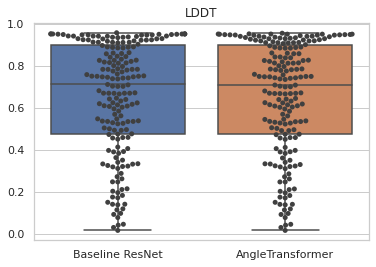

In [52]:
ax = sns.boxplot(data=pdb_df[['bl_lddt', 'at_lddt']], showfliers=False, )
sns.swarmplot(data=pdb_df[['bl_lddt', 'at_lddt']], color=".25")
# plt.xlabel("Model")
# plt.ylabel("MAE (rad)")
plt.title("LDDT")

# labels = ax.get_xticklabels()
# print(labels)
labels = ["Baseline ResNet", "AngleTransformer"]
ax.set_xticklabels(labels)

pdb_df[['bl_lddt', 'at_lddt']].describe()

bl_chi_angles_mae  at_chi_angles_mae
count         187.000000         187.000000
mean            0.389361           0.393904
std             0.110763           0.109791
min             0.236534           0.242054
25%             0.315766           0.321021
50%             0.367225           0.372237
75%             0.425007           0.431134
max             0.989297           0.993380

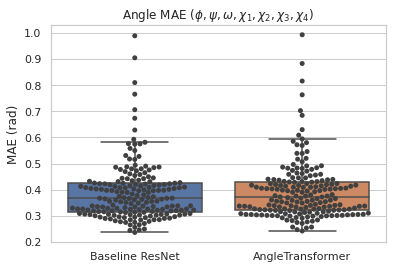

In [53]:
ax = sns.boxplot(data=pdb_df[['bl_chi_angles_mae', 'at_chi_angles_mae']], showfliers=False, )
sns.swarmplot(data=pdb_df[['bl_chi_angles_mae', 'at_chi_angles_mae']], color=".25")
# plt.xlabel("Model")
plt.ylabel("MAE (rad)")
plt.title("Angle MAE ($\phi, \psi, \omega, \chi_1, \chi_2, \chi_3, \chi_4$)")

# labels = ax.get_xticklabels()
# print(labels)
labels = ["Baseline ResNet", "AngleTransformer"]
ax.set_xticklabels(labels)

pdb_df[['bl_chi_angles_mae', 'at_chi_angles_mae']].describe()

bl_chi_angles_mae_deg  at_chi_angles_mae_deg
count             187.000000             187.000000
mean               22.308766              22.569061
std                 6.346240               6.290568
min                13.552394              13.868690
25%                18.092060              18.393153
50%                21.040450              21.327594
75%                24.351122              24.702172
max                56.682531              56.916477

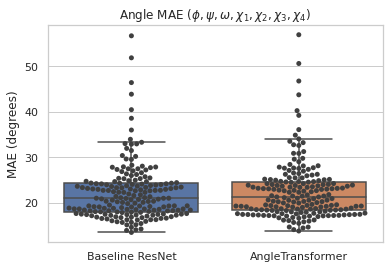

In [54]:
ax = sns.boxplot(data=pdb_df[['bl_chi_angles_mae_deg', 'at_chi_angles_mae_deg']], showfliers=False, )
sns.swarmplot(data=pdb_df[['bl_chi_angles_mae_deg', 'at_chi_angles_mae_deg']], color=".25")
# plt.xlabel("Model")
plt.ylabel("MAE (degrees)")
plt.title("Angle MAE ($\phi, \psi, \omega, \chi_1, \chi_2, \chi_3, \chi_4$)")

# labels = ax.get_xticklabels()
# print(labels)
labels = ["Baseline ResNet", "AngleTransformer"]
ax.set_xticklabels(labels)

pdb_df[['bl_chi_angles_mae_deg', 'at_chi_angles_mae_deg']].describe()

bl_chionly_angles_mae_deg  at_chionly_angles_mae_deg
count                 187.000000                 187.000000
mean                   39.955201                  40.611081
std                     7.382221                   7.311905
min                    26.684987                  27.352871
25%                    34.615989                  35.375388
50%                    38.986476                  39.587256
75%                    43.592407                  44.190353
max                    62.213116                  62.530322

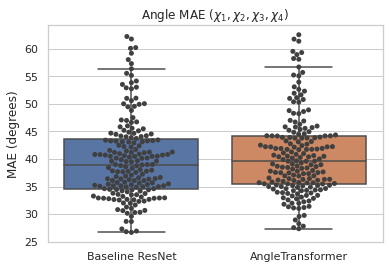

In [56]:
ax = sns.boxplot(data=pdb_df[['bl_chionly_angles_mae_deg', 'at_chionly_angles_mae_deg']], showfliers=False, )
sns.swarmplot(data=pdb_df[['bl_chionly_angles_mae_deg', 'at_chionly_angles_mae_deg']], color=".25")
# plt.xlabel("Model")
plt.ylabel("MAE (degrees)")
plt.title("Angle MAE ($\chi_1, \chi_2, \chi_3, \chi_4$)")

# labels = ax.get_xticklabels()
# print(labels)
labels = ["Baseline ResNet", "AngleTransformer"]
ax.set_xticklabels(labels)

pdb_df[['bl_chionly_angles_mae_deg', 'at_chionly_angles_mae_deg']].describe()

/net/pulsar/home/koes/jok120/anaconda3/envs/sidechainnetv2/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 11.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/net/pulsar/home/koes/jok120/anaconda3/envs/sidechainnetv2/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 11.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


bl_bbonly_angles_mae_deg  at_bbonly_angles_mae_deg
count                187.000000                187.000000
mean                  10.419194                 10.416326
std                    6.894235                  6.901852
min                    4.455333                  4.468577
25%                    6.839680                  6.880184
50%                    8.886790                  8.893636
75%                   11.605231                 11.621142
max                   61.229276                 61.241557

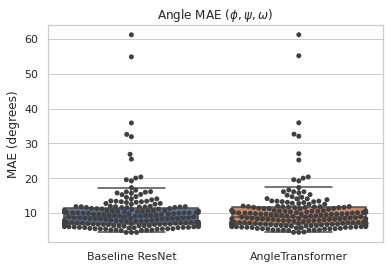

In [57]:
ax = sns.boxplot(data=pdb_df[['bl_bbonly_angles_mae_deg', 'at_bbonly_angles_mae_deg']], showfliers=False, )
sns.swarmplot(data=pdb_df[['bl_bbonly_angles_mae_deg', 'at_bbonly_angles_mae_deg']], color=".25")
# plt.xlabel("Model")
plt.ylabel("MAE (degrees)")
plt.title("Angle MAE ($\phi, \psi, \omega$)")

# labels = ax.get_xticklabels()
# print(labels)
labels = ["Baseline ResNet", "AngleTransformer"]
ax.set_xticklabels(labels)

pdb_df[['bl_bbonly_angles_mae_deg', 'at_bbonly_angles_mae_deg']].describe()

## Single Angle Plots

In [58]:
l = list(range(10))
l

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [59]:
l[3:4]

[3]

In [60]:
pdb_df['true_bl_chi_angles'].iloc[0][:, 7:9]

array([], shape=(69, 0), dtype=float64)

bl_x1_angles_mae_deg  at_x1_angles_mae_deg
count            187.000000            187.000000
mean              27.365117             28.144443
std               10.000405              9.932780
min               12.886039             13.401954
25%               19.817655             20.750558
50%               25.213658             26.005483
75%               32.076956             32.902959
max               66.149951             68.528550

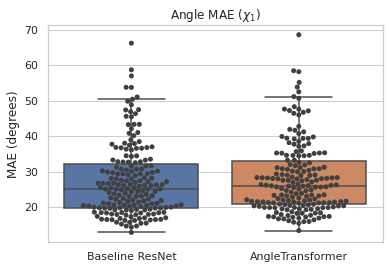

In [61]:
pdb_df['bl_x1_angles_mae'] = pdb_df.apply(lambda row: float(angle_mae(torch.tensor(row['true_bl_chi_angles'][:, 3:4]), torch.tensor(row['pred_bl_chi_angles'][:, 3:4]))), axis=1)
pdb_df['at_x1_angles_mae'] = pdb_df.apply(lambda row: float(angle_mae(torch.tensor(row['true_at_chi_angles'][:, 3:4]), torch.tensor(row['pred_at_chi_angles'][:, 3:4]))), axis=1)

pdb_df['bl_x1_angles_mae_deg'] = pdb_df['bl_x1_angles_mae'].apply(lambda x: np.rad2deg(x))
pdb_df['at_x1_angles_mae_deg'] = pdb_df['at_x1_angles_mae'].apply(lambda x: np.rad2deg(x))

ax = sns.boxplot(data=pdb_df[['bl_x1_angles_mae_deg', 'at_x1_angles_mae_deg']], showfliers=False, )
sns.swarmplot(data=pdb_df[['bl_x1_angles_mae_deg', 'at_x1_angles_mae_deg']], color=".25")
# plt.xlabel("Model")
plt.ylabel("MAE (degrees)")
plt.title("Angle MAE ($\chi_1$)")

# labels = ax.get_xticklabels()
# print(labels)
labels = ["Baseline ResNet", "AngleTransformer"]
ax.set_xticklabels(labels)

pdb_df[['bl_x1_angles_mae_deg', 'at_x1_angles_mae_deg']].describe()

bl_x2_angles_mae_deg  at_x2_angles_mae_deg
count            187.000000            187.000000
mean              44.443087             45.078709
std                8.078953              7.982720
min               25.987927             26.547287
25%               38.959471             40.037523
50%               44.399956             44.538256
75%               48.978228             49.320582
max               66.289449             63.996637

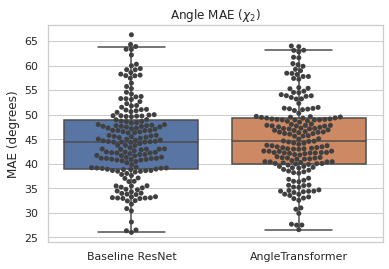

In [62]:
pdb_df['bl_x2_angles_mae'] = pdb_df.apply(lambda row: float(angle_mae(torch.tensor(row['true_bl_chi_angles'][:, 4:5]), torch.tensor(row['pred_bl_chi_angles'][:, 4:5]))), axis=1)
pdb_df['at_x2_angles_mae'] = pdb_df.apply(lambda row: float(angle_mae(torch.tensor(row['true_at_chi_angles'][:, 4:5]), torch.tensor(row['pred_at_chi_angles'][:, 4:5]))), axis=1)

pdb_df['bl_x2_angles_mae_deg'] = pdb_df['bl_x2_angles_mae'].apply(lambda x: np.rad2deg(x))
pdb_df['at_x2_angles_mae_deg'] = pdb_df['at_x2_angles_mae'].apply(lambda x: np.rad2deg(x))

ax = sns.boxplot(data=pdb_df[['bl_x2_angles_mae_deg', 'at_x2_angles_mae_deg']], showfliers=False, )
sns.swarmplot(data=pdb_df[['bl_x2_angles_mae_deg', 'at_x2_angles_mae_deg']], color=".25")
# plt.xlabel("Model")
plt.ylabel("MAE (degrees)")
plt.title("Angle MAE ($\chi_2$)")

# labels = ax.get_xticklabels()
# print(labels)
labels = ["Baseline ResNet", "AngleTransformer"]
ax.set_xticklabels(labels)

pdb_df[['bl_x2_angles_mae_deg', 'at_x2_angles_mae_deg']].describe()

bl_x3_angles_mae_deg  at_x3_angles_mae_deg
count            187.000000            187.000000
mean              60.895636             61.519982
std               10.906851             10.630821
min               36.479440             35.596011
25%               52.653596             54.301007
50%               60.101228             60.834938
75%               67.618616             67.828134
max               89.124577             90.177924

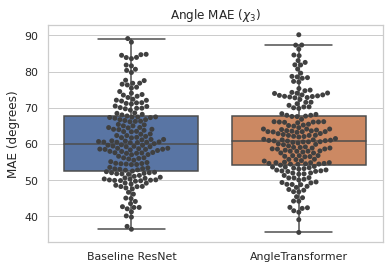

In [63]:
pdb_df['bl_x3_angles_mae'] = pdb_df.apply(lambda row: float(angle_mae(torch.tensor(row['true_bl_chi_angles'][:, 5:6]), torch.tensor(row['pred_bl_chi_angles'][:, 5:6]))), axis=1)
pdb_df['at_x3_angles_mae'] = pdb_df.apply(lambda row: float(angle_mae(torch.tensor(row['true_at_chi_angles'][:, 5:6]), torch.tensor(row['pred_at_chi_angles'][:, 5:6]))), axis=1)

pdb_df['bl_x3_angles_mae_deg'] = pdb_df['bl_x3_angles_mae'].apply(lambda x: np.rad2deg(x))
pdb_df['at_x3_angles_mae_deg'] = pdb_df['at_x3_angles_mae'].apply(lambda x: np.rad2deg(x))

ax = sns.boxplot(data=pdb_df[['bl_x3_angles_mae_deg', 'at_x3_angles_mae_deg']], showfliers=False, )
sns.swarmplot(data=pdb_df[['bl_x3_angles_mae_deg', 'at_x3_angles_mae_deg']], color=".25")
# plt.xlabel("Model")
plt.ylabel("MAE (degrees)")
plt.title("Angle MAE ($\chi_3$)")

# labels = ax.get_xticklabels()
# print(labels)
labels = ["Baseline ResNet", "AngleTransformer"]
ax.set_xticklabels(labels)

pdb_df[['bl_x3_angles_mae_deg', 'at_x3_angles_mae_deg']].describe()

bl_x4_angles_mae_deg  at_x4_angles_mae_deg
count            187.000000            187.000000
mean              49.946240             49.900499
std               11.835096             11.528077
min               13.057865             12.264766
25%               42.928326             43.270880
50%               49.362473             48.653410
75%               56.669124             57.021786
max               83.746724             82.650432

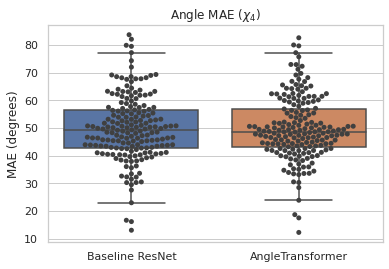

In [64]:
pdb_df['bl_x4_angles_mae'] = pdb_df.apply(lambda row: float(angle_mae(torch.tensor(row['true_bl_chi_angles'][:, 6:7]), torch.tensor(row['pred_bl_chi_angles'][:, 6:7]))), axis=1)
pdb_df['at_x4_angles_mae'] = pdb_df.apply(lambda row: float(angle_mae(torch.tensor(row['true_at_chi_angles'][:, 6:7]), torch.tensor(row['pred_at_chi_angles'][:, 6:7]))), axis=1)

pdb_df['bl_x4_angles_mae_deg'] = pdb_df['bl_x4_angles_mae'].apply(lambda x: np.rad2deg(x))
pdb_df['at_x4_angles_mae_deg'] = pdb_df['at_x4_angles_mae'].apply(lambda x: np.rad2deg(x))

ax = sns.boxplot(data=pdb_df[['bl_x4_angles_mae_deg', 'at_x4_angles_mae_deg']], showfliers=False, )
sns.swarmplot(data=pdb_df[['bl_x4_angles_mae_deg', 'at_x4_angles_mae_deg']], color=".25")
# plt.xlabel("Model")
plt.ylabel("MAE (degrees)")
plt.title("Angle MAE ($\chi_4$)")

# labels = ax.get_xticklabels()
# print(labels)
labels = ["Baseline ResNet", "AngleTransformer"]
ax.set_xticklabels(labels)

pdb_df[['bl_x4_angles_mae_deg', 'at_x4_angles_mae_deg']].describe()

bl_phi_angles_mae_deg  at_phi_angles_mae_deg
count             187.000000             187.000000
mean               12.045509              12.028350
std                 6.205410               6.185352
min                 4.944529               4.947792
25%                 8.071395               8.111390
50%                10.674412              10.668276
75%                13.786329              13.797332
max                46.342474              47.112079

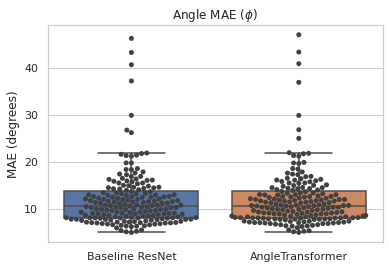

In [65]:
pdb_df['bl_phi_angles_mae'] = pdb_df.apply(lambda row: float(angle_mae(torch.tensor(row['true_bl_chi_angles'][:, 0:1]), torch.tensor(row['pred_bl_chi_angles'][:, 0:1]))), axis=1)
pdb_df['at_phi_angles_mae'] = pdb_df.apply(lambda row: float(angle_mae(torch.tensor(row['true_at_chi_angles'][:, 0:1]), torch.tensor(row['pred_at_chi_angles'][:, 0:1]))), axis=1)

pdb_df['bl_phi_angles_mae_deg'] = pdb_df['bl_phi_angles_mae'].apply(lambda x: np.rad2deg(x))
pdb_df['at_phi_angles_mae_deg'] = pdb_df['at_phi_angles_mae'].apply(lambda x: np.rad2deg(x))

ax = sns.boxplot(data=pdb_df[['bl_phi_angles_mae_deg', 'at_phi_angles_mae_deg']], showfliers=False, )
sns.swarmplot(data=pdb_df[['bl_phi_angles_mae_deg', 'at_phi_angles_mae_deg']], color=".25")
# plt.xlabel("Model")
plt.ylabel("MAE (degrees)")
plt.title("Angle MAE ($\phi$)")

# labels = ax.get_xticklabels()
# print(labels)
labels = ["Baseline ResNet", "AngleTransformer"]
ax.set_xticklabels(labels)

pdb_df[['bl_phi_angles_mae_deg', 'at_phi_angles_mae_deg']].describe()

/net/pulsar/home/koes/jok120/anaconda3/envs/sidechainnetv2/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 33.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


bl_psi_angles_mae_deg  at_psi_angles_mae_deg
count             187.000000             187.000000
mean               15.110944              15.115821
std                14.673010              14.693297
min                 5.300902               5.437093
25%                 8.782139               8.806238
50%                11.981378              11.999161
75%                16.166196              16.029216
max               151.292360             151.325356

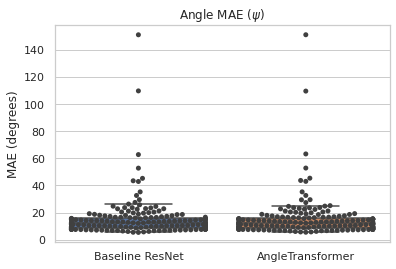

In [66]:
pdb_df['bl_psi_angles_mae'] = pdb_df.apply(lambda row: float(angle_mae(torch.tensor(row['true_bl_chi_angles'][:, 1:2]), torch.tensor(row['pred_bl_chi_angles'][:, 1:2]))), axis=1)
pdb_df['at_psi_angles_mae'] = pdb_df.apply(lambda row: float(angle_mae(torch.tensor(row['true_at_chi_angles'][:, 1:2]), torch.tensor(row['pred_at_chi_angles'][:, 1:2]))), axis=1)

pdb_df['bl_psi_angles_mae_deg'] = pdb_df['bl_psi_angles_mae'].apply(lambda x: np.rad2deg(x))
pdb_df['at_psi_angles_mae_deg'] = pdb_df['at_psi_angles_mae'].apply(lambda x: np.rad2deg(x))

ax = sns.boxplot(data=pdb_df[['bl_psi_angles_mae_deg', 'at_psi_angles_mae_deg']], showfliers=False, )
sns.swarmplot(data=pdb_df[['bl_psi_angles_mae_deg', 'at_psi_angles_mae_deg']], color=".25")
# plt.xlabel("Model")
plt.ylabel("MAE (degrees)")
plt.title("Angle MAE ($\psi$)")

# labels = ax.get_xticklabels()
# print(labels)
labels = ["Baseline ResNet", "AngleTransformer"]
ax.set_xticklabels(labels)

pdb_df[['bl_psi_angles_mae_deg', 'at_psi_angles_mae_deg']].describe()

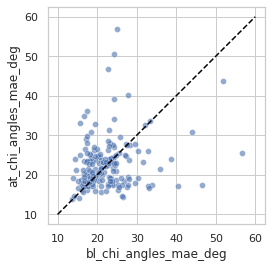

In [67]:
# Make distribution plots of the MAE of the chi angles

# Make a scatter plot of the MAE of the chi angles
sns.scatterplot(data=pdb_df, x='bl_chi_angles_mae_deg', y='at_chi_angles_mae_deg', alpha=0.6)

# Make the scatter plot square
plt.gca().set_aspect('equal', adjustable='box')
# Make the x and y axes have the same number of ticks
plt.gca().set_xticks(plt.gca().get_yticks())
plt.gca().set_yticks(plt.gca().get_xticks())


# Add a y = x line 
x = np.linspace(*plt.xlim())
plt.plot(x, x, color='black', linestyle='--')




In [68]:
# Find the row in which at_chi_angles_mae_deg is the lowest
ex_idx = pdb_df['at_chi_angles_mae_deg'].idxmin()
bad_idx = pdb_df['at_chi_angles_mae_deg'].idxmax()

### Good Examples

In [ ]:
p1 = pdb_df['true_at_scnprotein_obj'].iloc[ex_idx]
p2 = pdb_df['pred_at_scnprotein_obj'].iloc[ex_idx]
p1.to_3Dmol(other_protein=p2)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [ ]:
p1 = pdb_df['true_bl_scnprotein_obj'].iloc[ex_idx]
p2 = pdb_df['pred_bl_scnprotein_obj'].iloc[ex_idx]
p1.to_3Dmol(other_protein=p2)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [ ]:
p1 = pdb_df['pred_bl_scnprotein_obj'].iloc[ex_idx]
p2 = pdb_df['pred_at_scnprotein_obj'].iloc[ex_idx]
p1.to_3Dmol(other_protein=p2)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

### Bad example

In [ ]:
p1 = pdb_df['true_at_scnprotein_obj'].iloc[bad_idx]
p2 = pdb_df['pred_at_scnprotein_obj'].iloc[bad_idx]
p1.to_3Dmol(other_protein=p2)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [ ]:
p1 = pdb_df['true_bl_scnprotein_obj'].iloc[bad_idx]
p2 = pdb_df['pred_bl_scnprotein_obj'].iloc[bad_idx]
p1.to_3Dmol(other_protein=p2)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [ ]:
pdb_df.columns

Index(['pdb_id', 'pdb_path_true_bl', 'pdb_path_true_at', 'pdb_path_pred_bl',
       'pdb_path_pred_at', 'pred_bl_scnprotein_obj', 'pred_at_scnprotein_obj',
       'true_bl_scnprotein_obj', 'true_at_scnprotein_obj',
       'true_bl_chionly_angles', 'true_at_chionly_angles',
       'pred_bl_chionly_angles', 'pred_at_chionly_angles',
       'true_bl_bbonly_angles', 'true_at_bbonly_angles',
       'pred_bl_bbonly_angles', 'pred_at_bbonly_angles', 'true_bl_chi_angles',
       'true_at_chi_angles', 'pred_bl_chi_angles', 'pred_at_chi_angles',
       'bl_chi_angles_mae', 'at_chi_angles_mae', 'bl_chi_angles_mae_deg',
       'at_chi_angles_mae_deg', 'bl_chionly_angles_mae',
       'at_chionly_angles_mae', 'bl_chionly_angles_mae_deg',
       'at_chionly_angles_mae_deg', 'bl_bbonly_angles_mae',
       'at_bbonly_angles_mae', 'bl_bbonly_angles_mae_deg',
       'at_bbonly_angles_mae_deg', 'bl_x1_angles_mae', 'at_x1_angles_mae',
       'bl_x1_angles_mae_deg', 'at_x1_angles_mae_deg', 'bl_x2_angles_mae